In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('C://Users/naikp/Downloads/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.size
df.shape
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
#x=df.iloc[:,:-1].values
x=np.array(df[['Level']])
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
#y=df.iloc[:,2]
y=np.array(df['Salary'])
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=1/2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

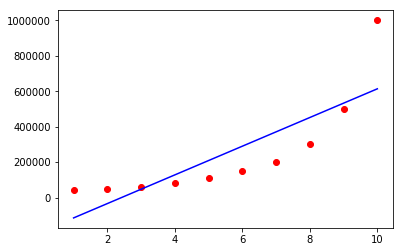

In [11]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')

Above data is not best reprented by linear model, that's why moving to polynomial

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x)
x_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [27]:
poly_reg.fit(x_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

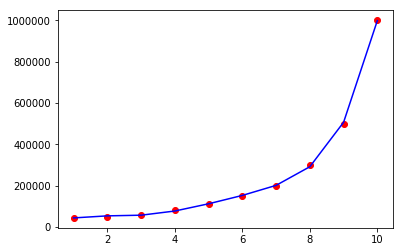

In [28]:
plt.scatter(x, y, color='red')
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)), color='blue')

In [29]:
regressor.predict([[6.5]])

array([330378.78787879])

In [30]:
y_pred= lin_reg_2.predict(poly_reg.fit_transform(x))
y_pred

array([ 43895.1048956 ,  53836.82983705,  57065.26806523,  77286.71328647,
       112263.40326306, 152736.59673623, 201349.65034936, 291571.09557096,
       506617.71561785, 998377.62237821])

In [31]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765118])

In [32]:
# finding accuracy 
from sklearn.metrics import r2_score
r2_score(y, lin_reg_2.predict(poly_reg.fit_transform(x)))

0.9997969027099755

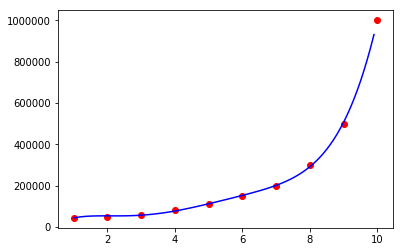

In [33]:
# More smoother polynomial curve
plt.scatter(x, y, color='red')
#plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)), color='blue')
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')

# Random Forest Algorithm

In [98]:
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators=10, random_state=0)
regressor2.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
y_pre = regressor2.predict(x)
y_pre

array([ 46000.,  49000.,  59000.,  74000., 101000., 136000., 210000.,
       305000., 470000., 850000.])

In [100]:
# finding accuracy 
from sklearn.metrics import r2_score
r2_score(y, regressor2.predict(x))

0.9704434230386582

In [101]:
regressor2.predict([[6.5]])

array([167000.])

Text(0.5, 1.0, 'Truth OR Bluff')

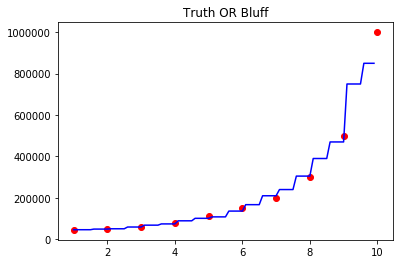

In [105]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x, y, color='red')
plt.plot(x_grid,regressor2.predict(x_grid), color='blue')
plt.title('Truth OR Bluff')

# Decision Tree Regression

In [106]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state=0)
regressor3.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [108]:
y_predc = regressor3.predict(x)
y_predc

array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

In [110]:
regressor3.predict([[6.5]])

array([150000.])

Text(0.5, 0, 'Position')

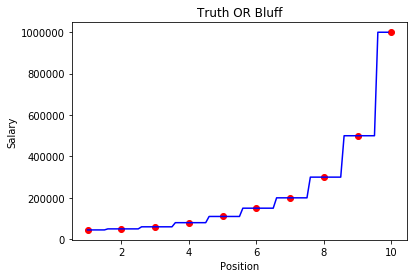

In [113]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x, y, color='red')
plt.plot(x_grid,regressor3.predict(x_grid), color='blue')
plt.title('Truth OR Bluff')
plt.ylabel('Salary')
plt.xlabel('Position Level')

# SVM (Support Vector Regression)

In [34]:
#feature scaling
y=y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(x)
Y = sc_Y.fit_transform(y)

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
from sklearn.svm import SVR
regressor4 = SVR(kernel = 'rbf')  #
regressor4.fit(X,Y)

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
y_op = regressor4.predict([[6.5]])
y_op = sc_Y.inverse_transform(y_op)
print(y_op)

[252789.13921624]


Text(0.5, 0, 'Position Level')

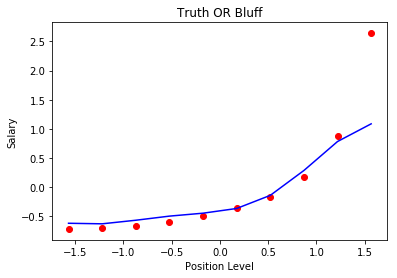

In [41]:
#x_grid = np.arange(min(x), max(x), 0.1)
#x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(X,Y, color='red')
plt.plot(X,regressor4.predict(X), color='blue')
plt.title('Truth OR Bluff')
plt.ylabel('Salary')
plt.xlabel('Position Level')

In [50]:
from sklearn import svm
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(x_train, y_train)
    confidence=clf.score(x_test, y_test)
    print(k , confidence)

linear -0.27800627490687635
poly 0.5776344661627074
rbf -0.2781591635067975
sigmoid -0.2781588247438809


C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
